IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

CONFIGURE PLOT STYLING

In [4]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

LOAD DATASET

In [6]:
df = pd.read_csv('C:/Users/khush/Desktop/datasets/student_feedback.csv')

INSPECT DATA

In [8]:
print(df.head())
print(df.info())

   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                        2   
2                

CLEAN DATA

In [10]:
df.dropna(how='all', inplace=True)

In [11]:
df.columns = df.columns.str.strip().str.replace('"', '')

In [12]:
rating_columns = [col for col in df.columns if col != 'Student ID']
for col in rating_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].where((df[col] >= 1) & (df[col] <= 10))

In [13]:
df.drop_duplicates(subset=['Student ID'], inplace=True)

CHECK MISSING VALUES

In [15]:
print(df.isnull().sum())

Unnamed: 0                                              991
Student ID                                                0
Well versed with the subject                              0
Explains concepts in an understandable way                0
Use of presentations                                      0
Degree of difficulty of assignments                       0
Solves doubts willingly                                   0
Structuring of the course                                 0
Provides support for students going above and beyond      0
Course recommendation based on relevance                  0
dtype: int64


VISUALIZATION

In [17]:
low_rating_counts = pd.Series(dtype=int)
for col in rating_columns:
    count = df[df[col] <= 4][col].count()
    low_rating_counts[col] = count
low_rating_counts = low_rating_counts.sort_values(ascending=False)

In [18]:
df['EventTypeProxy'] = df['Use of presentations'].apply(lambda x: 'Seminar-like' if x >= 7 else 'Workshop-like' if pd.notnull(x) else np.nan)

In [19]:
df['AvgSatisfaction'] = df[rating_columns].mean(axis=1, skipna=True)

In [20]:
event_type_avg = df.groupby('EventTypeProxy')['Course recommendation based on relevance'].mean().reset_index()

In [21]:
scatter_data = df[['Use of presentations', 'Course recommendation based on relevance']].dropna()

In [22]:
df['HighRecommendation'] = df['Course recommendation based on relevance'] >= 8

In [23]:
structure_counts = df[df['HighRecommendation']].groupby('Structuring of the course').size().reset_index(name='Count')

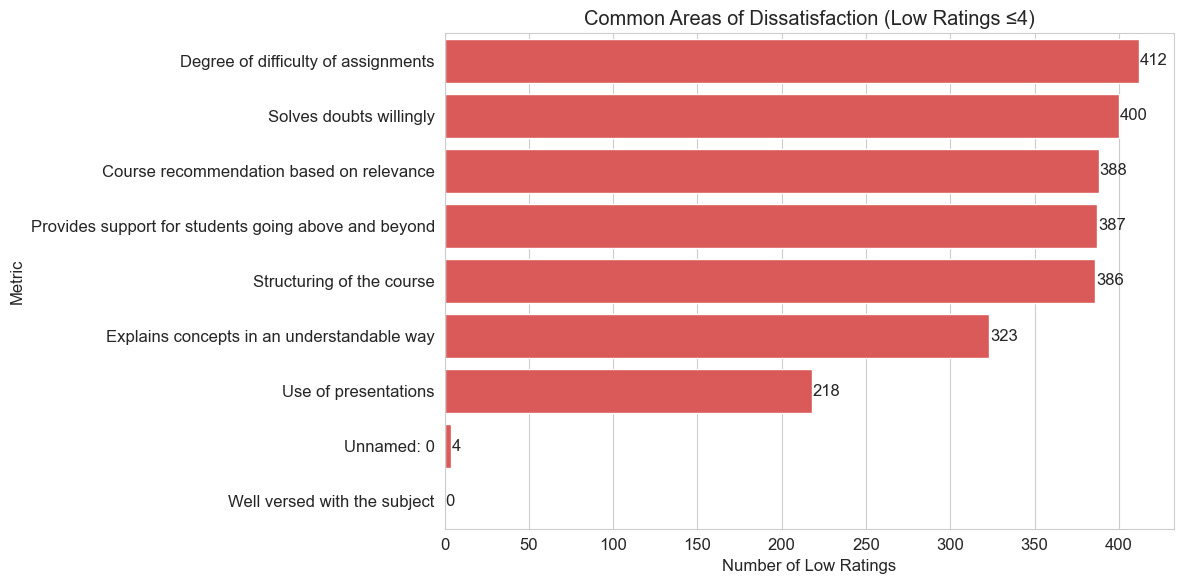

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=low_rating_counts.values, y=low_rating_counts.index, color='#EF4444')
plt.title('Common Areas of Dissatisfaction (Low Ratings ≤4)')
plt.xlabel('Number of Low Ratings')
plt.ylabel('Metric')
for i, v in enumerate(low_rating_counts.values):
    plt.text(v + 0.5, i, f'{v}', va='center')
plt.tight_layout()
plt.show()

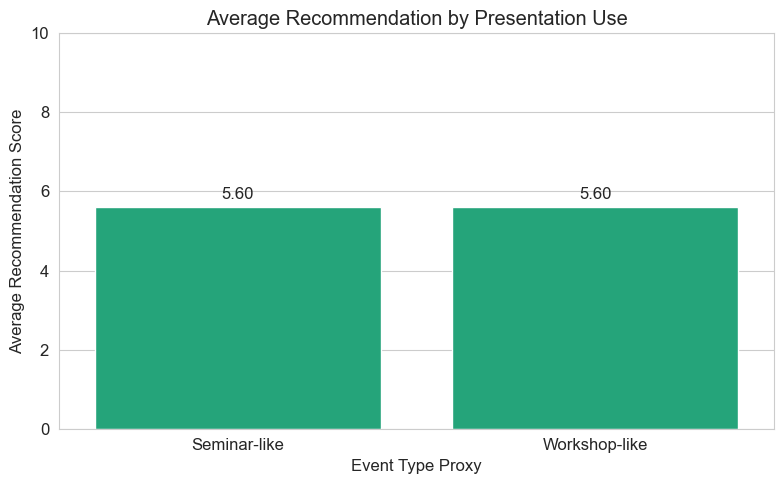

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=event_type_avg, x='EventTypeProxy', y='Course recommendation based on relevance', color='#10B981')
plt.title('Average Recommendation by Presentation Use')
plt.xlabel('Event Type Proxy')
plt.ylabel('Average Recommendation Score')
plt.ylim(0, 10)
for i, v in enumerate(event_type_avg['Course recommendation based on relevance']):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

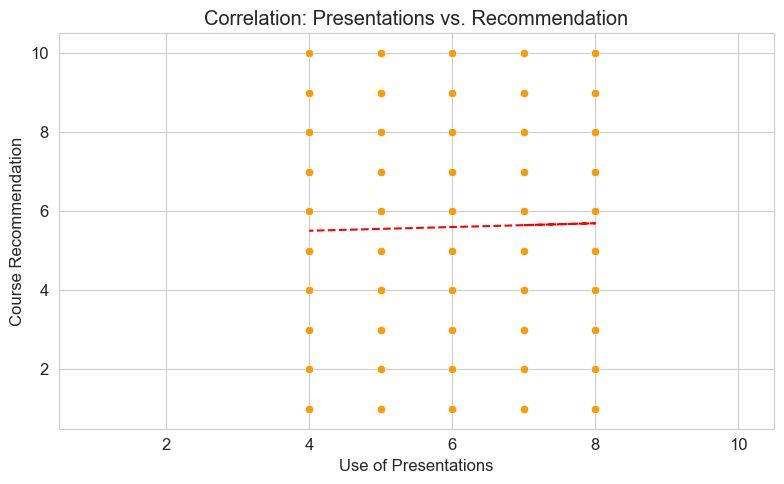

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=scatter_data, x='Use of presentations', y='Course recommendation based on relevance', color='#F59E0B')
plt.title('Correlation: Presentations vs. Recommendation')
plt.xlabel('Use of Presentations')
plt.ylabel('Course Recommendation')
plt.xlim(0.5, 10.5)
plt.ylim(0.5, 10.5)
# Add regression line
z = np.polyfit(scatter_data['Use of presentations'], scatter_data['Course recommendation based on relevance'], 1)
p = np.poly1d(z)
plt.plot(scatter_data['Use of presentations'], p(scatter_data['Use of presentations']), "r--")
plt.tight_layout()
plt.show()

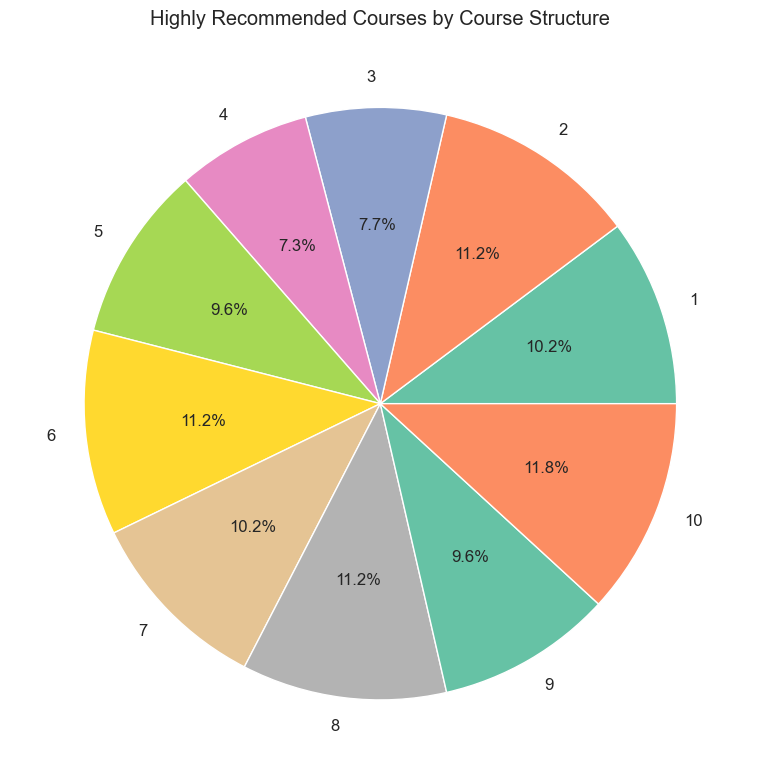

In [27]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2", len(structure_counts))
plt.pie(structure_counts['Count'], labels=structure_counts['Structuring of the course'], autopct='%1.1f%%', colors=colors)
plt.title('Highly Recommended Courses by Course Structure')
plt.tight_layout()
plt.show()

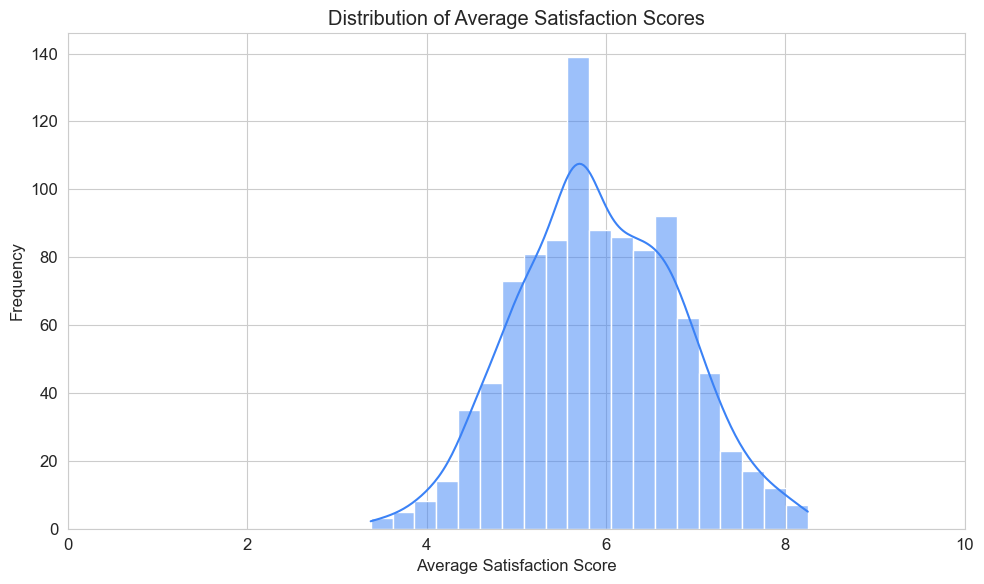

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AvgSatisfaction'].dropna(), bins=20, kde=True, color='#3B82F6')
plt.title('Distribution of Average Satisfaction Scores')
plt.xlabel('Average Satisfaction Score')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

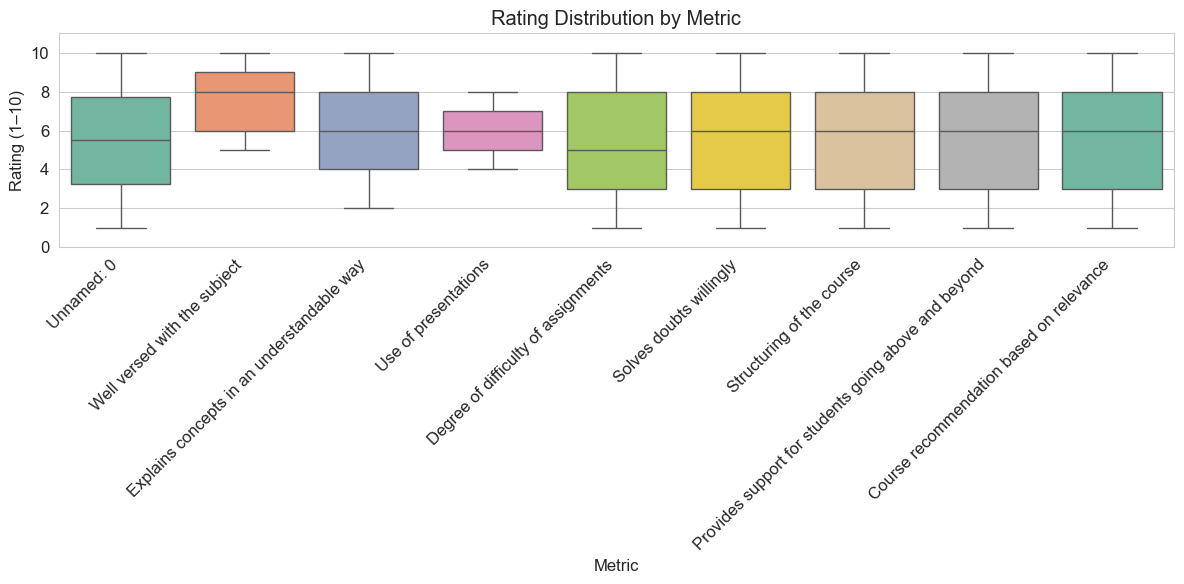

In [29]:
df_melted = df[rating_columns].melt(var_name='Metric', value_name='Rating')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Rating', data=df_melted, palette='Set2', hue='Metric', legend=False)
plt.title('Rating Distribution by Metric')
plt.xlabel('Metric')
plt.ylabel('Rating (1–10)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 11)
plt.tight_layout()
plt.show()

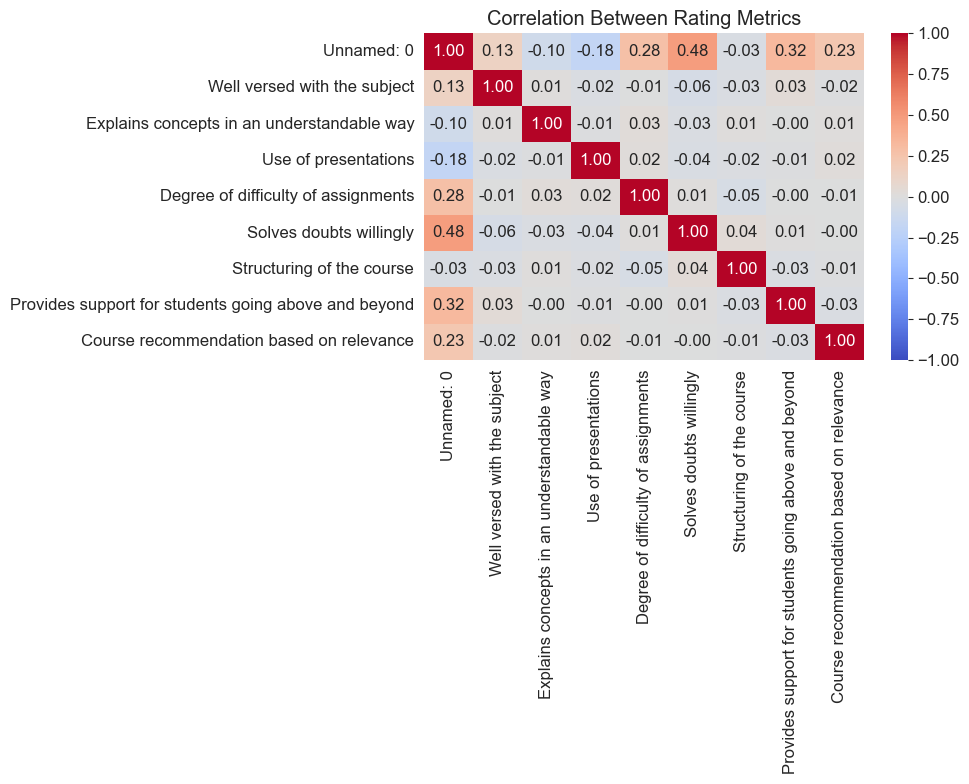

In [30]:
corr_matrix = df[rating_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Between Rating Metrics')
plt.tight_layout()
plt.show()